# 영화 리뷰 감정 이진 분류

In [1]:
# IMDB 영화 리뷰 감정 이진 분류
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

1641221/1641221 [==============================] - 1s 0us/step


In [3]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, seqeunce in enumerate(sequences):
    for j in seqeunce:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))


Epoch 1/20
118/118 [==============================] - 8s 22ms/step - loss: 0.4280 - accuracy: 0.8259 - val_loss: 0.2975 - val_accuracy: 0.8842
Epoch 2/20
118/118 [==============================] - 2s 14ms/step - loss: 0.2269 - accuracy: 0.9160 - val_loss: 0.3134 - val_accuracy: 0.8726
Epoch 3/20
118/118 [==============================] - 2s 15ms/step - loss: 0.1691 - accuracy: 0.9385 - val_loss: 0.3011 - val_accuracy: 0.8827
Epoch 4/20
118/118 [==============================] - 2s 16ms/step - loss: 0.1304 - accuracy: 0.9543 - val_loss: 0.3207 - val_accuracy: 0.8803
Epoch 5/20
118/118 [==============================] - 1s 11ms/step - loss: 0.1018 - accuracy: 0.9653 - val_loss: 0.3890 - val_accuracy: 0.8680
Epoch 6/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0792 - accuracy: 0.9731 - val_loss: 0.4204 - val_accuracy: 0.8684
Epoch 7/20
118/118 [==============================] - 2s 14ms/step - loss: 0.0608 - accuracy: 0.9805 - val_loss: 0.5053 - val_accuracy: 0.8610

In [9]:
import tensorflow as tf
# 모델을 TFLite 형식으로 변환
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# TFLite 모델을 파일로 저장
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

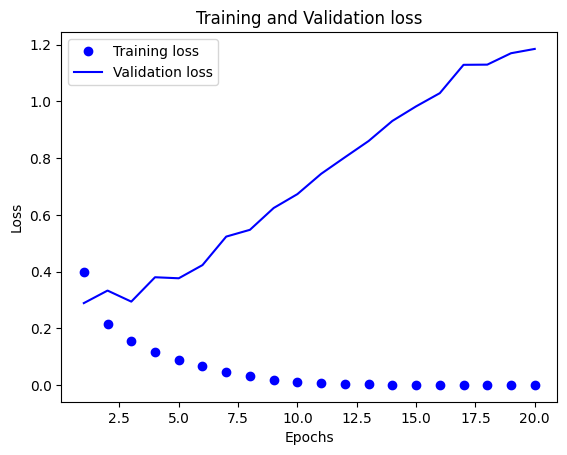

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

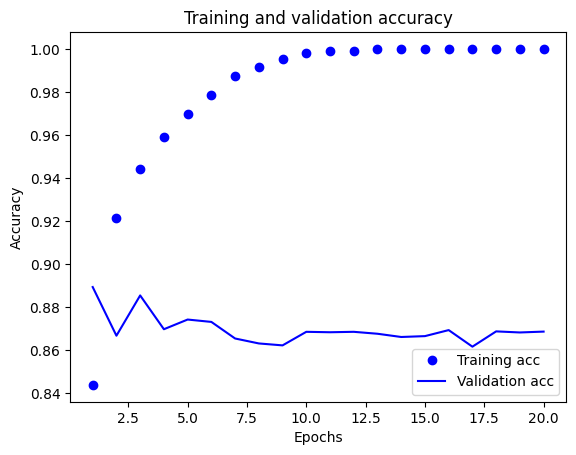

In [ ]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 2s 3ms/step - loss: 1.2896 - accuracy: 0.8536
[1.289567232131958, 0.8535599708557129]


In [ ]:
model_again = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation="sigmoid")
])

model_again.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

history_again = model_again.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4754 - accuracy: 0.8121
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2839 - accuracy: 0.9011
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2216 - accuracy: 0.9208
Epoch 4/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1884 - accuracy: 0.9318


In [ ]:
results_again = model_again.evaluate(x_test, y_test)
print(results_again)

782/782 [==============================] - 2s 3ms/step - loss: 0.2844 - accuracy: 0.8866
[0.2844153344631195, 0.8866000175476074]


In [ ]:
# 추가 실험
# 층수 증감
# 1개 표현 층 사용
# 3개 표현층 사용

# 층 유닛 증감
# 32개, 64개

# 손실함수 변경
# mse 손실함수 사용

# 활성화 함수 변경
# tanh 사용

# 뉴스 기사 분류 문제

In [ ]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
) # test_split 매개변수가 존재하며, 기본값은 0.2

word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i -3, "?") for i in train_data[0]])

decoded_newswire

550378/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
from keras.utils import to_categorical

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# def to_one_hot(labels, dimension=46):
#   results = np.zeros((len(labels), dimension))
#   for i, label in enumerate(labels):
#     results[i, label] = 1.
# y_train = to_one_hot(train_labels)
# y_test = to_one_hot(test_labels)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 주택 가격 예측 문제

In [ ]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_label), (test_data, test_label) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
def build_model():
  model = keras.Sequential([
      leyers.Dense(64, activation='relu'),
      leyers.Dense(64, activation='relu'),
      leyers.Dense(1)
  ])

  model_compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f'#{i}번째 폴드 처리중')
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]